In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
#defining general parameters

number_of_offspring_per_female = 3

In [10]:
#preferecencs (A mutual choice; B female only)

A_08_preference_dictionary = {

    'A_females_preference_for_A_male': 0.8,
    'A_females_preference_for_B_male': 1 - 0.8,
    'B_females_preference_for_B_male': 0.8,
    'B_females_preference_for_A_male': 1 - 0.8,
    'A_males_preference_for_A_female': 0.8,
    'A_males_preference_for_B_female': 1 - 0.8,
    'B_males_preference_for_B_female': 0.5,
    'B_males_preference_for_A_female': 1 - 0.5
}



In [11]:
#compatibility function

#probability of succesful mating is (prference of male x preference of female). In this context, preference is probability of acceptance of the mating offer.

def mating_compatibility(male_type, female_type, preference_dictionary):
    if male_type == "A":
        if female_type == "A":
            mating_compatibility = preference_dictionary['A_males_preference_for_A_female'] * preference_dictionary['A_females_preference_for_A_male']
        elif female_type == "B":
            mating_compatibility = preference_dictionary['A_males_preference_for_B_female'] * preference_dictionary['B_females_preference_for_A_male']
    elif male_type == "B":
        if female_type == "A":
            mating_compatibility = preference_dictionary['B_males_preference_for_A_female'] * preference_dictionary['A_females_preference_for_B_male']
        elif female_type == "B":
            mating_compatibility = preference_dictionary['B_males_preference_for_B_female'] * preference_dictionary['B_females_preference_for_B_male']
    return mating_compatibility


Simulation 



In [12]:
''' simulates two species over a number of generations and returns the winner [the species that which dominates the population while the other goes extinct] (1 if A wins, -1 if B wins, 0 if both coexist) for given parameters of number of generations, max mating attempts per male, preference dictionary'''

def simulate_two_species_over_generations(number_of_generations, population_size_of_each_species, max_mating_attempt_for_male, preference_dictionary, number_of_offspring_per_female):

        winner = "0"

        number_of_A = int(population_size_of_each_species//2)
        number_of_B = int(population_size_of_each_species//2)

        number_of_A_males = int(number_of_A//2)
        number_of_A_females = int(number_of_A//2)

        number_of_B_males = int(number_of_B//2)
        number_of_B_females = int(number_of_B//2)

        for k in range(number_of_generations):


                #make population lists based on number of individuals so that it can be sampled from
                males_A_list = ["A"]*number_of_A_males
                males_B_list = ["B"]*number_of_B_males
                females_A_list = ["A"]*number_of_A_females
                females_B_list = ["B"]*number_of_B_females

                all_males_list = males_A_list + males_B_list
                all_female_list = females_A_list + females_B_list


                #reset number of offspring to zero
                number_of_A_offspring = 0
                number_of_B_offspring = 0

                unmated_male_list = all_males_list.copy()
                unmated_female_list = all_female_list.copy()

                #mating and reproduction 
                while unmated_male_list != [] and unmated_female_list != []:   #Matings happen until there are no unmated males or females left
                
                        chosen_male_type = random.choice(unmated_male_list)   #male randomly chosen

                        mating_attempt_for_male = 1  

                        while mating_attempt_for_male <= max_mating_attempt_for_male and unmated_female_list != []:  #male can mate only a fixed number of times

                                chosen_female_type = random.choice(unmated_female_list)    #female chosen at random

                                mating_attempt_for_male += 1


                                if random.random() < mating_compatibility(chosen_male_type, chosen_female_type, preference_dictionary): 
                                        #mating success

                                        unmated_female_list.remove(chosen_female_type)
                                        
                                        if chosen_male_type == "A" and chosen_female_type == "A":
                                                number_of_A_offspring += number_of_offspring_per_female
                                        
                                        if chosen_male_type == "B" and chosen_female_type == "B":
                                                number_of_B_offspring += number_of_offspring_per_female


                total_number_of_offspring = number_of_A_offspring + number_of_B_offspring
                
                number_of_A_offspring_normalised_to_N = round((number_of_A_offspring/total_number_of_offspring)*population_size_of_each_species)   #N held constant
                number_of_B_offspring_normalised_to_N = round((number_of_B_offspring/total_number_of_offspring)*population_size_of_each_species)
                

                number_of_male_A_offspring = sum(np.random.binomial(1, 0.5, number_of_A_offspring_normalised_to_N))    #sex randomly assigned to offspring with ratio is 1:1
                number_of_female_A_offspring = number_of_A_offspring_normalised_to_N - number_of_male_A_offspring

                number_of_male_B_offspring = sum(np.random.binomial(1, 0.5, number_of_B_offspring_normalised_to_N))
                number_of_female_B_offspring = number_of_B_offspring_normalised_to_N - number_of_male_B_offspring

                if min(number_of_male_A_offspring, number_of_female_A_offspring, number_of_male_B_offspring, number_of_female_B_offspring) < 2:


                        if number_of_male_A_offspring < 2 or number_of_female_A_offspring == 2:
                                winner = "-1"
                        else:
                                winner = "1"                    #-1 case where A goes extinct (B wins), 1 case where B goes extinct (A wins), 0  where both species coexist

                        break   
        
                number_of_A_males = number_of_male_A_offspring
                number_of_A_females = number_of_female_A_offspring
                number_of_B_males = number_of_male_B_offspring
                number_of_B_females = number_of_female_B_offspring

        return winner

In [15]:
'''since outcome is stochastic, simulation run multiple times obtain an avergae outcome'''

def population_outcome_for_given_parameter_combination(number_of_generations, population_size_of_each_species, max_mating_attempt_for_male,preference_dictionary, number_of_offspring_per_female):

    outcome_list = []
    for i in range(10):
        outcome = simulate_two_species_over_generations(number_of_generations, population_size_of_each_species, max_mating_attempt_for_male, preference_dictionary, number_of_offspring_per_female)
        outcome_list.append(int(outcome))
        
    avg_outcome = np.mean(outcome_list)
    return avg_outcome


[-1.0, -1.0, -1.0, -1.0, -0.8, 0.0, -0.8, -1.0, -0.8, -1.0]


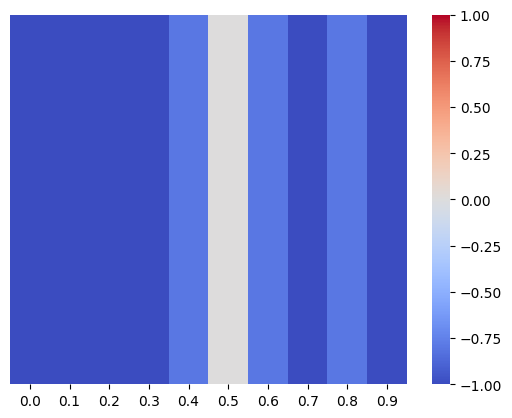

In [18]:
'''understanding the relation b/w degree of male homotypic preference of species A on outcome. In all cases, males of species B mate indiscriminately. Female homotypic preference of both species is kept constant at 0.8 '''

alpha_list = []
avg_outcome_list = []

for alpha in np.arange(0, 1, 0.1):     #alpha varies from 0 to 1 in steps of 0.1. Below 0.5 heterotypic preference, above 0.5 homotypic preference. 1 is complete homotypic preference

    preference_dictionary_for_alpha = {

        'A_females_preference_for_A_male': 0.8,
        'A_females_preference_for_B_male': 0.2,
        'B_females_preference_for_B_male': 0.8,
        'B_females_preference_for_A_male': 0.2,
        'A_males_preference_for_A_female': alpha,
        'A_males_preference_for_B_female': 1 - alpha,
        'B_males_preference_for_B_female': 0.5,
        'B_males_preference_for_A_female': 0.5
    }


    avg_outcome = population_outcome_for_given_parameter_combination(100, 10000, 5 ,preference_dictionary_for_alpha, 3)   #100 generations, total pop - 10000, max matings per female 3
    
    alpha_list.append(alpha)
    avg_outcome_list.append(avg_outcome)


print(avg_outcome_list)
sns.heatmap([avg_outcome_list], xticklabels=np.round(alpha_list, 1), yticklabels=False, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.show()


Species with female-only choice seems to do better consistently